<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/expno5/scenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Roll No:24BAD094

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Fill numeric columns with median
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

# Fill categorical columns with mode
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)


/tmp/ipython-input-1586109014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
/tmp/ipython-input-1586109014.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [5]:
le_edu = LabelEncoder()
df['Education_Encoded'] = le_edu.fit_transform(df['Education'])

le_area = LabelEncoder()
df['Property_Area_Encoded'] = le_area.fit_transform(df['Property_Area'])

le_target = LabelEncoder()
df['Loan_Status_Encoded'] = le_target.fit_transform(df['Loan_Status'])
# Approved = 1, Rejected = 0


In [6]:
features = ['ApplicantIncome', 'LoanAmount', 'Credit_History',
            'Education_Encoded', 'Property_Area_Encoded']

X = df[features]
y = df['Loan_Status_Encoded']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
dtree = DecisionTreeClassifier(max_depth=None, random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dtree.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.7235772357723578
              precision    recall  f1-score   support

           0       0.63      0.51      0.56        43
           1       0.76      0.84      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.67      0.68       123
weighted avg       0.71      0.72      0.72       123



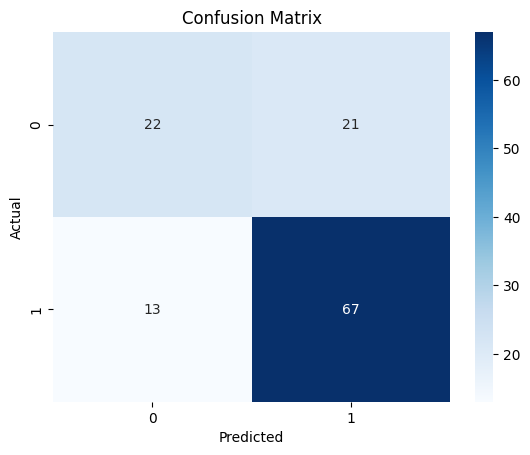

In [11]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


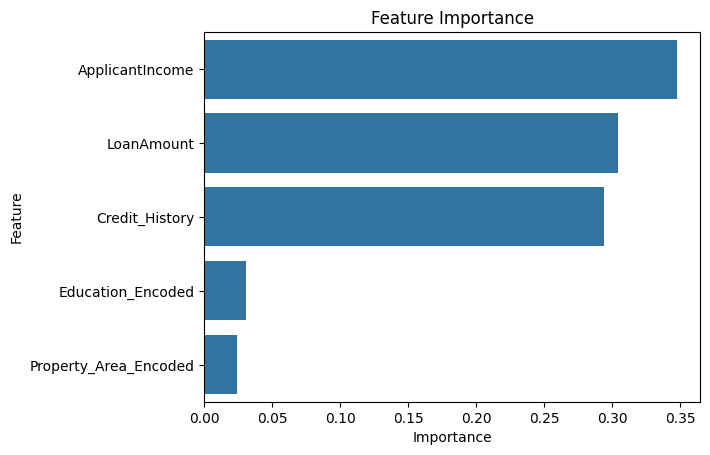

In [12]:
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dtree.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Feature Importance")
plt.show()


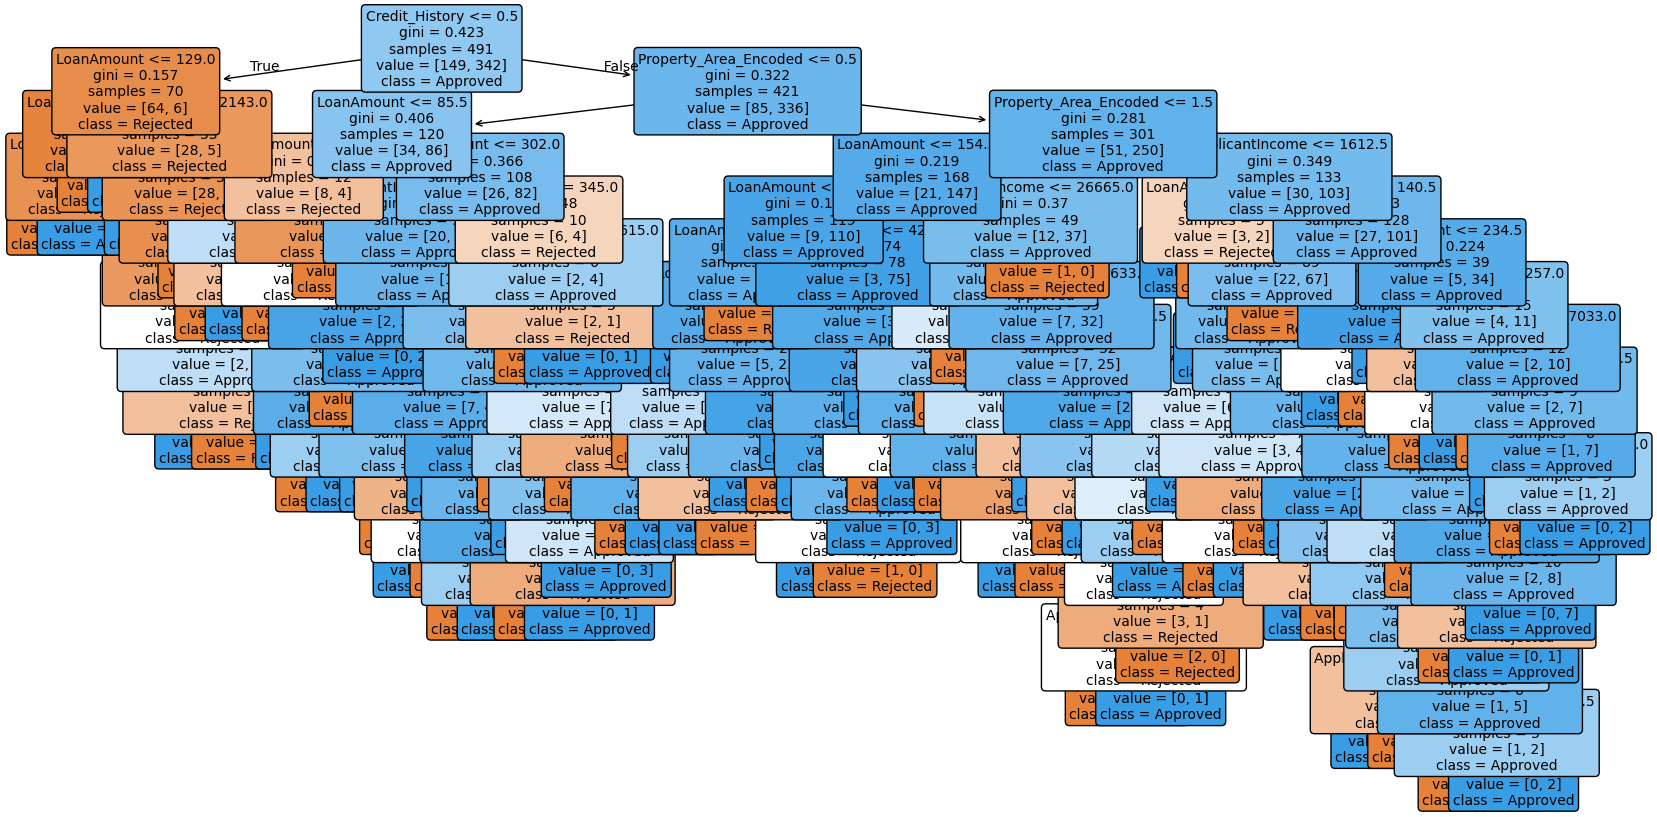

In [13]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=features, class_names=['Rejected','Approved'],
          filled=True, rounded=True, fontsize=10)
plt.show()


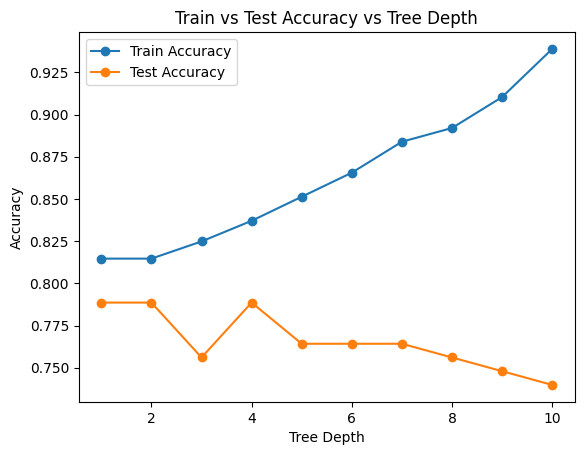

In [14]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.plot(depths, train_acc, label="Train Accuracy", marker='o')
plt.plot(depths, test_acc, label="Test Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy vs Tree Depth")
plt.legend()
plt.show()
